# Step 1: Import Required Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


# Step 2: Upload CSV File Using Google Colab’s Upload Option

In [1]:
# Import the files module for uploading
from google.colab import files

# Upload the CSV file
uploaded = files.upload()



Saving Cluster2_Pheno-data.csv to Cluster2_Pheno-data.csv


In [9]:
# Load the dataset
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Cluster2_Pheno-data.csv']))

# Preview the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Unnamed: 0  ProjectID shorthand_x                   FILE_LIST_x  YEAR_x  \
0           0     235024        C2.1  project235024_year2001.Rdata    2001   
1           1     235024        C2.1  project235024_year2001.Rdata    2001   
2           2     235024        C2.1  project235024_year2001.Rdata    2001   
3           3     235024        C2.1  project235024_year2001.Rdata    2001   
4           4     235024        C2.1  project235024_year2001.Rdata    2001   

    LOC  LONGITUDE  LATITUDE  LINE      ERM  ...  shorthand_y  Unnamed: 0_y  \
0  ILBM     -89.12     39.70   1.0  115.337  ...         C2.1          1381   
1  ILMN     -90.65     40.91   1.0  113.284  ...         C2.1          1381   
2  INVI     -87.52     38.68   1.0  114.346  ...         C2.1          1381   
3  MOBU     -94.20     39.14   1.0  113.914  ...         C2.1          1381   
4  MOHA     -94.98     39.34   1.0  116.823  ...         C2.1          1381   

   MAB_PROJECT_ID  YEAR_y  GERMPLASM_ID

In [10]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535340 entries, 0 to 535339
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           535340 non-null  int64  
 1   ProjectID            535340 non-null  int64  
 2   shorthand_x          535340 non-null  object 
 3   FILE_LIST_x          535340 non-null  object 
 4   YEAR_x               535340 non-null  int64  
 5   LOC                  535340 non-null  object 
 6   LONGITUDE            532726 non-null  float64
 7   LATITUDE             532726 non-null  float64
 8   LINE                 535340 non-null  float64
 9   ERM                  331368 non-null  float64
 10  MST                  520111 non-null  float64
 11  PHT                  154281 non-null  float64
 12  RTLP                 248495 non-null  float64
 13  STLP                 342467 non-null  float64
 14  TWT                  468517 non-null  float64


# Step 3: Select Specified Columns

In [11]:
# Select only the specified columns
data = data[['YEAR_x', 'LOC', 'LONGITUDE', 'LATITUDE', 'LINE_UNIQUE_ID', 'MST', 'TWT', 'CROSS', 'YLD_BE']]
print("\nSelected Columns Preview:")
print(data.head())



Selected Columns Preview:
   YEAR_x   LOC  LONGITUDE  LATITUDE LINE_UNIQUE_ID   MST   TWT  \
0    2001  ILBM     -89.12     39.70       C2.1.1.0  19.2  59.7   
1    2001  ILMN     -90.65     40.91       C2.1.1.0  23.3  58.3   
2    2001  INVI     -87.52     38.68       C2.1.1.0  20.4  59.9   
3    2001  MOBU     -94.20     39.14       C2.1.1.0  21.0  55.1   
4    2001  MOHA     -94.98     39.34       C2.1.1.0  20.1  58.3   

             CROSS   YLD_BE  
0  3289442/3577856  155.743  
1  3289442/3577856  201.541  
2  3289442/3577856  242.344  
3  3289442/3577856  221.077  
4  3289442/3577856  204.472  


# Step 4: Handle Missing Values

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values Count:\n", missing_values)

# Impute missing values if necessary
# Here we're using mean imputation as an example, but you may choose other methods depending on the column.
# imputer = SimpleImputer(strategy='mean')
# data[['MST', 'TWT', 'YLD_BE']] = imputer.fit_transform(data[['MST', 'TWT', 'YLD_BE']])

# Verify that there are no missing values left
#print("\nMissing Values After Imputation:\n", data.isnull().sum())



Missing Values Count:
 YEAR_x                0
LOC                   0
LONGITUDE          2614
LATITUDE           2614
LINE_UNIQUE_ID        0
MST               15229
TWT               66823
CROSS                 0
YLD_BE            23357
dtype: int64


# Step 5: Scaling and Normalizing the Data (Optional)

In [14]:
# If you need to normalize or scale your data (especially for machine learning models), you can use either StandardScaler or MinMaxScaler.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the scaler
scaler = StandardScaler()

# Scale selected columns
data[['MST', 'TWT', 'YLD_BE']] = scaler.fit_transform(data[['MST', 'TWT', 'YLD_BE']])

print("\nScaled Data Preview:")
print(data[['MST', 'TWT', 'YLD_BE']].head())



Scaled Data Preview:
        MST       TWT    YLD_BE
0 -0.100067  1.208805 -1.133070
1  0.892339  0.694646  0.132467
2  0.190393  1.282257  1.259977
3  0.335623 -0.480574  0.672305
4  0.117778  0.694646  0.213459


# Step 6: Visualize the Data (Optional)

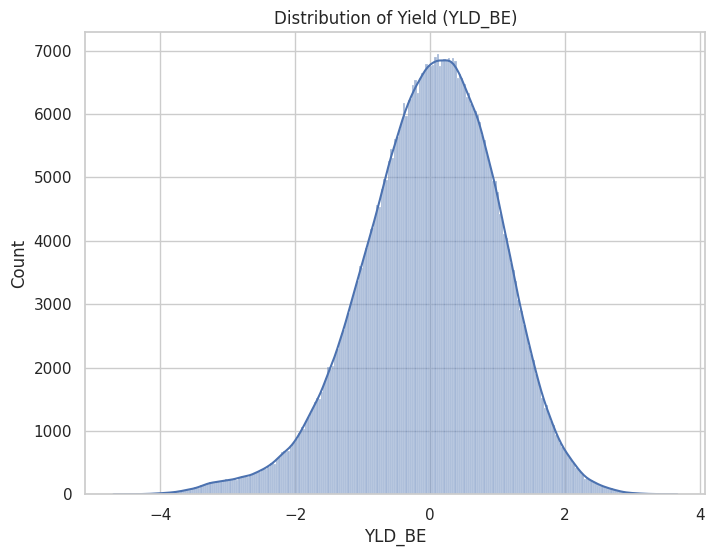

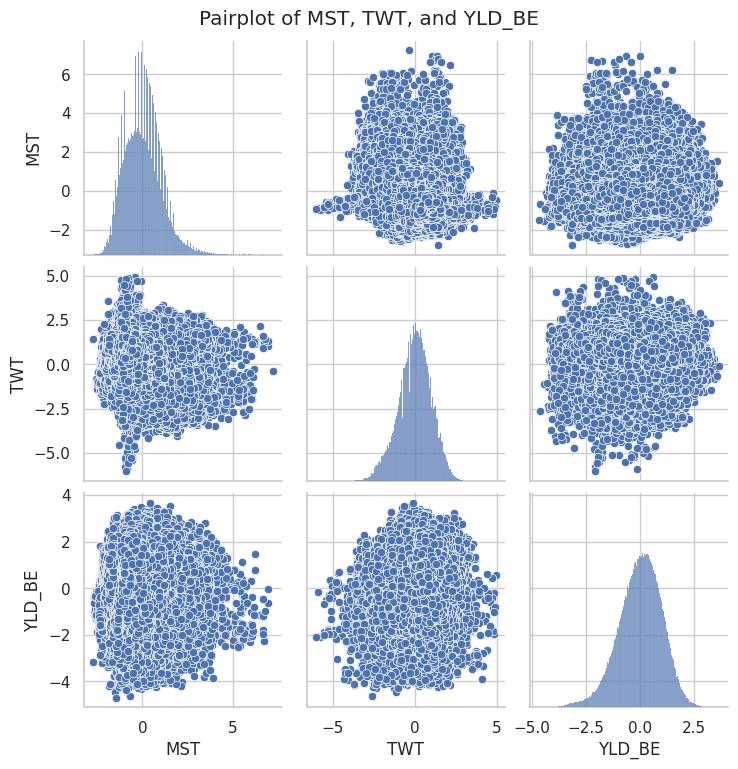

In [17]:
# Before diving into the analysis, a quick visualization helps in understanding the dataset’s distribution and any potential outliers.

import seaborn as sns
import matplotlib.pyplot as plt

# Set up Seaborn styles
sns.set(style="whitegrid")

# Histogram for Yield
plt.figure(figsize=(8, 6))
sns.histplot(data['YLD_BE'], kde=True)
plt.title('Distribution of Yield (YLD_BE)')
plt.show()

# Pairplot to see relationships
sns.pairplot(data[['MST', 'TWT', 'YLD_BE']])
plt.suptitle('Pairplot of MST, TWT, and YLD_BE', y=1.02)
plt.show()
